In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Continuing from Project_RFC.ipynb,

After getting satisfactory results from the predictive model, I will now perform futher analyisis to see if I can find more information regarding the cases involved in the crash. For this I will convert the predicited numeric data file into its nominal form using the user guide provided by FARS.

In [3]:
df = pd.read_csv("Project_predictions.csv")

In [5]:
X = df

In [6]:
X.head()

,PER_NO,DAY,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,DRINKING,ALC_DET,ALC_STATUS,...,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both,STATE,ST_CASE,MONTH
0,1,4,1,40.0,1,1,4,1,9,2,...,7,4,1,0,7,1,0,Alabama,10004,January
1,1,7,2,60.0,1,1,0,0,9,2,...,0,88,88,8,0,0,0,Alabama,10005,January
2,1,8,1,64.0,1,1,4,0,9,0,...,0,8,1,0,7,1,0,Alabama,10006,January
3,1,8,2,80.0,1,1,4,8,9,0,...,0,8,1,0,7,1,0,Alabama,10007,January
4,1,5,1,64.0,1,1,3,0,9,0,...,0,88,88,8,0,0,0,Alabama,10010,January


### Now I will convert the data in its nominal form using FARS user guide and perform analyisis on the distributions of the people involved in the crashes

In [7]:
X.columns

Index([u'PER_NO', u'DAY', u'RUR_URB', u'AGE', u'SEX', u'PER_TYP', u'INJ_SEV',
       u'DRINKING', u'ALC_DET', u'ALC_STATUS', u'ATST_TYP', u'ALC_RES',
       u'DRUGS', u'DRUGRES1', u'DRUGRES2', u'DRUGRES3', u'DOA', u'DEATH_DA',
       u'DEATH_MO', u'WORK_INJ', u'HISPANIC', u'RACE', u'both', u'STATE',
       u'ST_CASE', u'MONTH'],
      dtype='object')

1    250
2     29
3      6
5      2
4      2
Name: PER_NO, dtype: int64

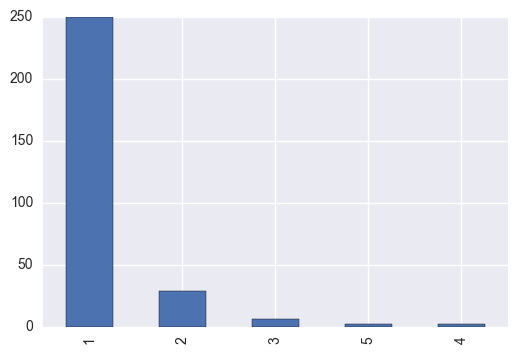

In [11]:
# Distribution of number of people in the vehicle involved in the crash
X[X['both']==1].PER_NO.value_counts().plot(kind='bar')
X[X['both']==1].PER_NO.value_counts()

13    18
25    15
3     15
8     13
22    12
12    12
14    11
10    11
26    10
28    10
20    10
18    10
16    10
6      9
7      9
9      9
11     9
1      9
21     9
17     8
27     8
4      8
31     8
23     7
29     7
2      7
30     6
19     6
15     5
24     4
5      4
Name: DAY, dtype: int64

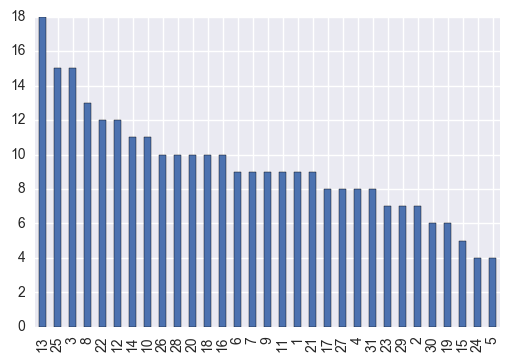

In [13]:
# Frequency distribution of days of a month involving crashes
X[X['both']==1].DAY.value_counts().plot(kind='bar')
X[X['both']==1].DAY.value_counts()

In [8]:
replacements = {
    'RUR_URB': {1:'Rural', 2:'Urban', 6:'Trafficway Not in State Inventory', 8:'Not Reported'},
    'SEX': {1:'Male', 2:'Female'}
    }
X.replace(replacements, regex=True, inplace=True)

Rural                                148
Urban                                126
Not Reported                          13
Trafficway Not in State Inventory      2
Name: RUR_URB, dtype: int64

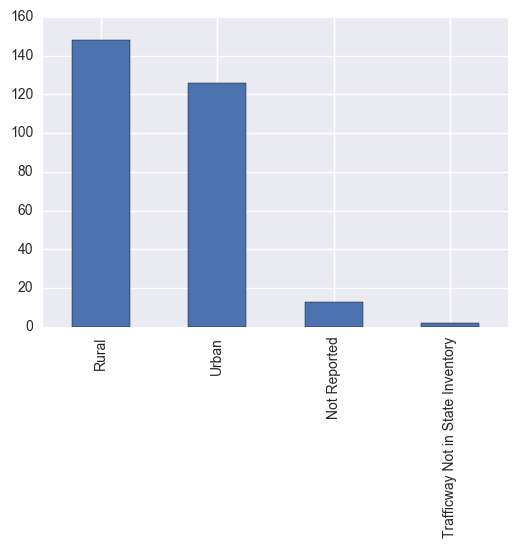

In [14]:
# Distribution of Urban/ Rural crashes
X[X['both']==1].RUR_URB.value_counts().plot(kind='bar')
X[X['both']==1].RUR_URB.value_counts()

Male      240
Female     49
Name: SEX, dtype: int64

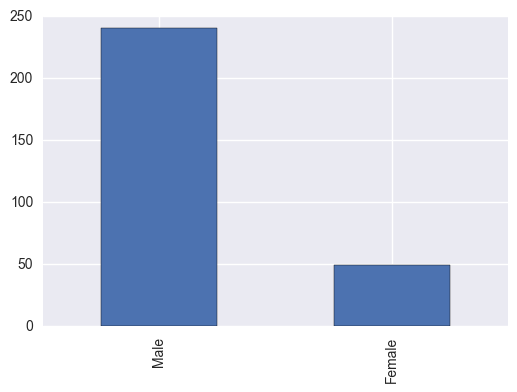

In [15]:
#Distirbution based on sex of person involved in the crash
X[X['both']==1].SEX.value_counts().plot(kind='bar')
X[X['both']==1].SEX.value_counts()

In [17]:
replacements = {
    'AGE': {39.27:'Not Reported', 1:'Less than one year'}
    }
X.replace(replacements, regex=True, inplace=True)

25.0    18
21.0    17
19.0    16
22.0    14
23.0    14
26.0    12
31.0    11
28.0    11
24.0    11
27.0    10
29.0     9
32.0     8
33.0     8
20.0     8
50.0     8
46.0     7
48.0     7
18.0     7
51.0     6
43.0     6
34.0     6
39.0     5
37.0     5
54.0     5
58.0     5
57.0     5
17.0     4
36.0     3
30.0     3
47.0     3
56.0     3
41.0     3
55.0     3
49.0     3
16.0     3
40.0     2
35.0     2
38.0     2
42.0     2
52.0     2
53.0     2
60.0     2
64.0     1
44.0     1
45.0     1
59.0     1
61.0     1
62.0     1
63.0     1
67.0     1
Name: AGE, dtype: int64

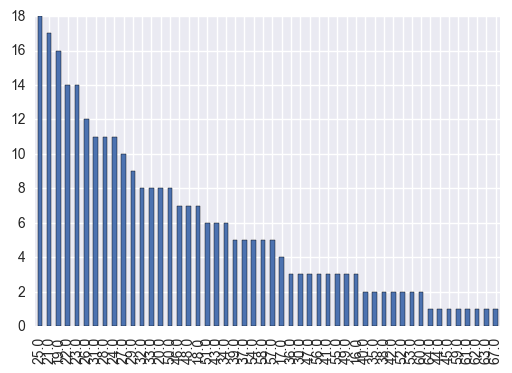

In [18]:
#Distribution based on age of the person
X[X['both']==1].AGE.value_counts().plot(kind='bar')
X[X['both']==1].AGE.value_counts()

Driver of a Motor Vehicle In-Transport       206
Passenger of a Motor Vehicle In-Transport     37
Pedestrian                                    36
Others                                        10
Name: PER_TYP, dtype: int64

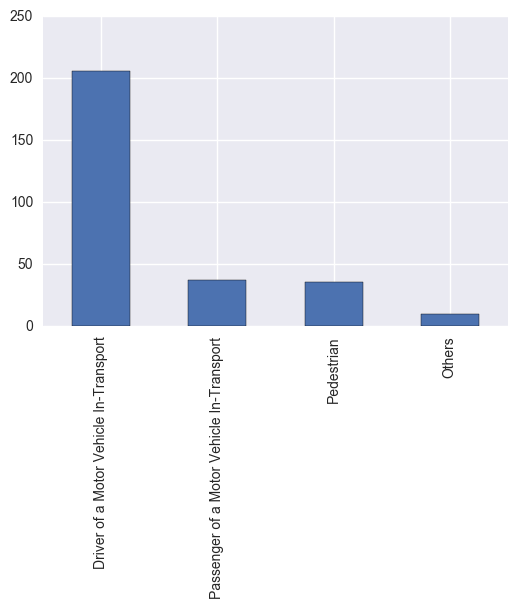

In [19]:
replacements = {
     'PER_TYP': {1:'Driver of a Motor Vehicle In-Transport', 2:'Passenger of a Motor Vehicle In-Transport',               
                5:'Pedestrian', 7:'Others'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on Type of the person
X[X['both']==1].PER_TYP.value_counts().plot(kind='bar')
X[X['both']==1].PER_TYP.value_counts()

Test Given    289
Name: ALC_STATUS, dtype: int64

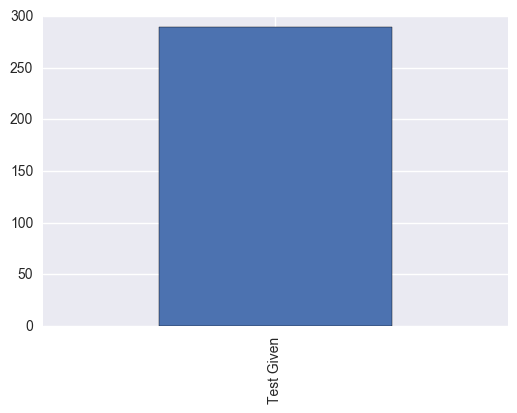

In [21]:
replacements = {
    'ALC_STATUS': {0:'Test Not Given', 2:'Test Given'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person has given alcohol test or not
X[X['both']==1].ALC_STATUS.value_counts().plot(kind='bar')
X[X['both']==1].ALC_STATUS.value_counts()

Fatal Injury    289
Name: INJ_SEV, dtype: int64

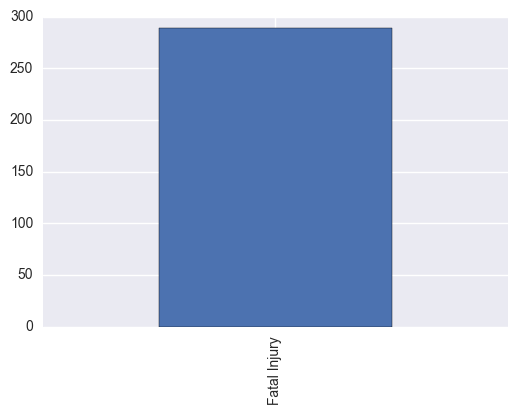

In [24]:
replacements = {
     'INJ_SEV': {0:'No Apparent Injury', 1:'Possible Injury', 2:'Suspected Minor Injury', 3:'Suspected Serious Injury',
                4:'Fatal Injury', 5:'Injured'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on injury of the person involved in the crash
X[X['both']==1].INJ_SEV.value_counts().plot(kind='bar')
X[X['both']==1].INJ_SEV.value_counts()

Yes             172
Not Reported     97
No               20
Name: DRINKING, dtype: int64

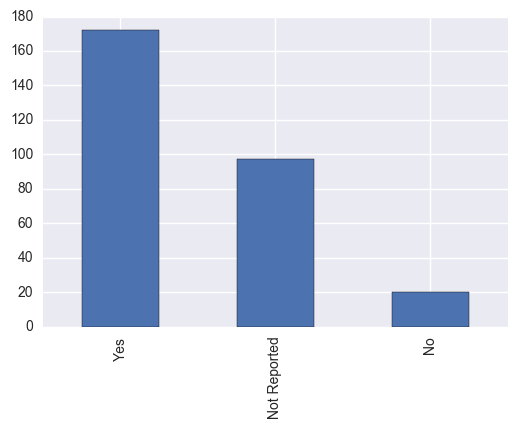

In [25]:
replacements = {
     'DRINKING': {0:'No', 1:'Yes', 8:'Not Reported'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the person was drining or not
X[X['both']==1].DRINKING.value_counts().plot(kind='bar')
X[X['both']==1].DRINKING.value_counts()

Not Reported       178
Evidential Test     94
observed            17
Name: ALC_DET, dtype: int64

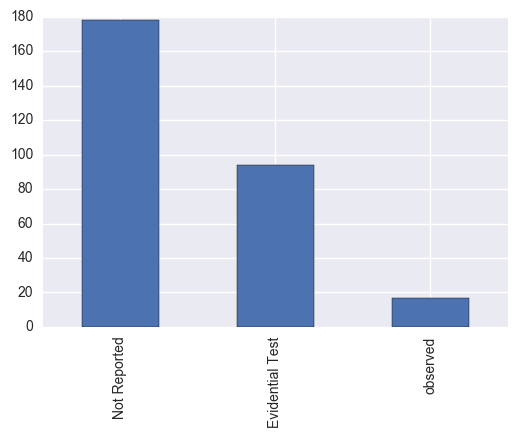

In [27]:
replacements = {
     'ALC_DET': {1:'Evidential Test',2:'Preliminary Breath Test', 3:'Behavioral', 4:'Passive Alcohol Sensor', 
                 5:'observed', 8:'Other', 9:'Not Reported',}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test of the person involved in crash
X[X['both']==1].ALC_DET.value_counts().plot(kind='bar')
X[X['both']==1].ALC_DET.value_counts()

Blood Test           278
Vitreous               4
Unknown Test Type      3
Urine                  3
Not Reported           1
Name: ATST_TYP, dtype: int64

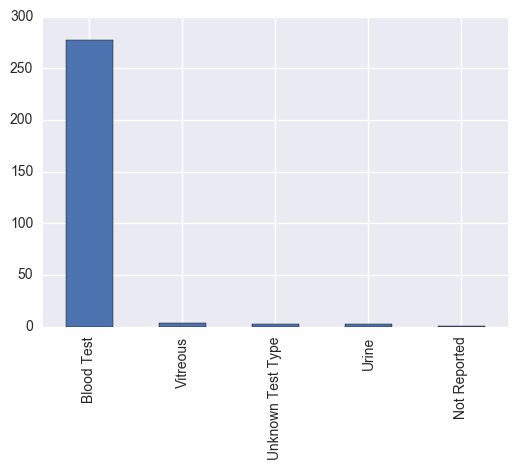

In [29]:
replacements = {
     'ATST_TYP': {1:'Blood Test',2:'Breath Test', 3:'Urine', 4:'Vitreous', 
                 5:'Blood Plasma', 8:'Other', 95:'Not Reported', 98:'Unknown Test Type'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol testtype of the person involved in crash
X[X['both']==1].ATST_TYP.value_counts().plot(kind='bar')
X[X['both']==1].ATST_TYP.value_counts()

Legally intoxicated    262
Below illegal limit     22
None Given               5
Name: ALC_RES, dtype: int64

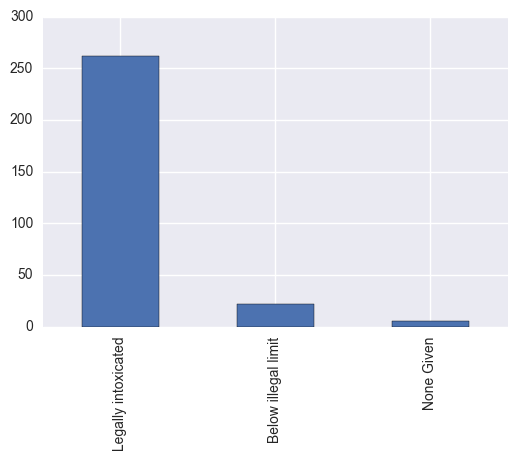

In [30]:
replacements = {
     'ALC_RES': {0.8:'Legally intoxicated',996:'None Given', 0:'Below illegal limit'}}
                 
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of alcohol test result of the person involved in crash
X[X['both']==1].ALC_RES.value_counts().plot(kind='bar')
X[X['both']==1].ALC_RES.value_counts()

Yes             99
Not Reported    75
Unknown         59
No              56
Name: DRUGS, dtype: int64

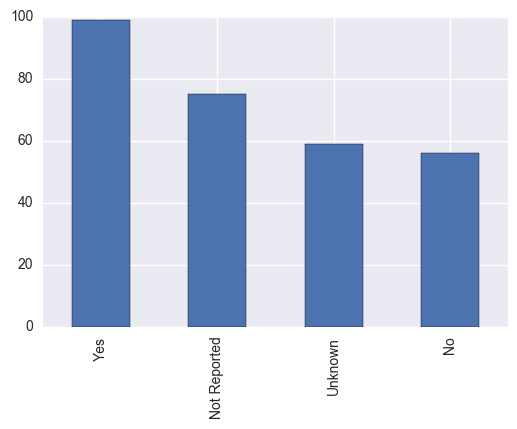

In [31]:
replacements = {
     'DRUGS': {0:'No', 1:'Yes', 8:'Not Reported', 9:'Unknown'}
    }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the if the person has take drug test or not
X[X['both']==1].DRUGS.value_counts().plot(kind='bar')
X[X['both']==1].DRUGS.value_counts()

Cannabinoid    236
Other Drugs     53
Name: DRUGRES1, dtype: int64

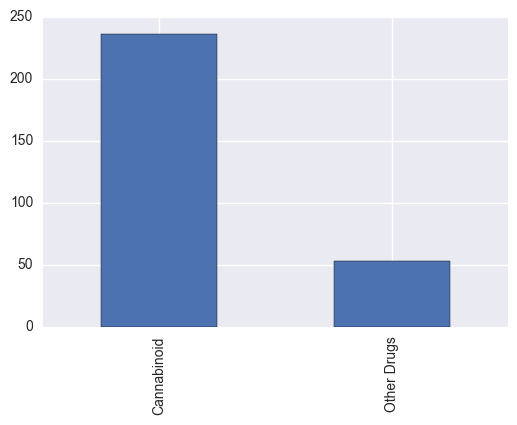

In [34]:
replacements = {
     'DRUGRES1': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES1.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES1.value_counts()

Not Tested for Drugs    146
Cannabinoid              94
Other Drugs              49
Name: DRUGRES2, dtype: int64

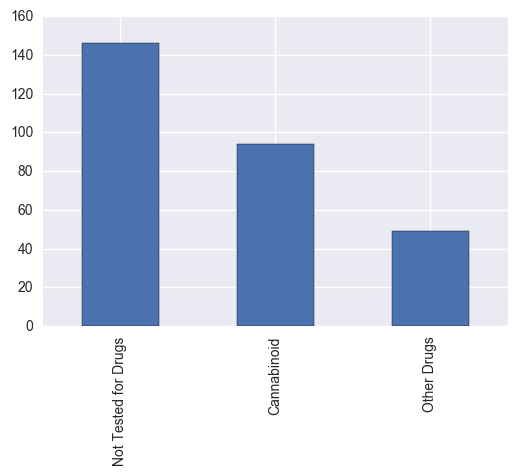

In [35]:
replacements = {
     'DRUGRES2': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES2.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES2.value_counts()

Not Tested for Drugs    242
Cannabinoid              27
Other Drugs              19
Reported Negative         1
Name: DRUGRES3, dtype: int64

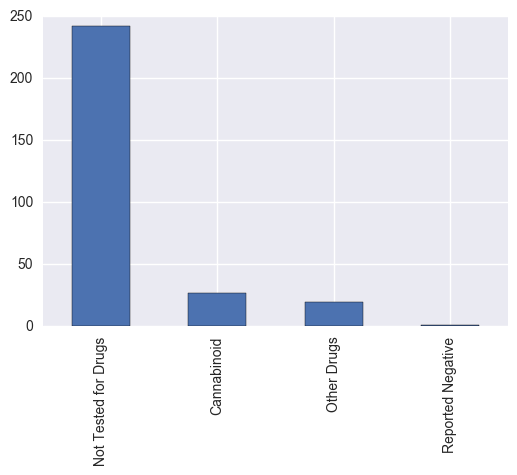

In [36]:
replacements = {
     'DRUGRES3': {0:'Not Tested for Drugs', 1:'Reported Negative', 95:'Not Reported', 695:'Cannabinoid', 996:'Other Drugs'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DRUGRES3.value_counts().plot(kind='bar')
X[X['both']==1].DRUGRES3.value_counts()

Died at Scene     217
Not Applicable     68
Died En Route       4
Name: DOA, dtype: int64

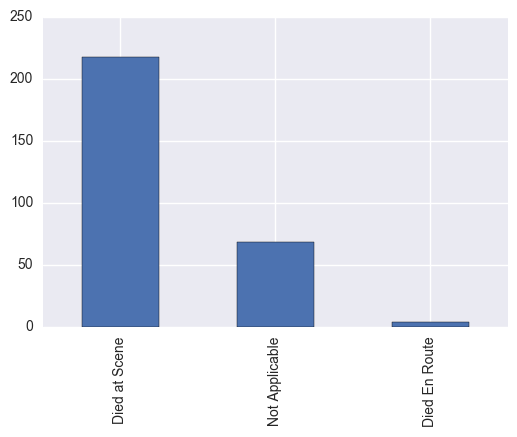

In [37]:
replacements = {
     'DOA': {0:'Not Applicable', 7:'Died at Scene', 8:'Died En Route'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the type of drug
X[X['both']==1].DOA.value_counts().plot(kind='bar')
X[X['both']==1].DOA.value_counts()

13    15
14    14
8     14
25    14
22    13
3     12
10    12
12    12
1     11
26    11
6     10
16    10
28    10
20    10
18     9
21     9
9      9
11     9
19     8
7      8
27     8
31     8
23     8
17     7
4      7
29     7
2      7
15     5
30     5
5      4
24     3
Name: DEATH_DA, dtype: int64

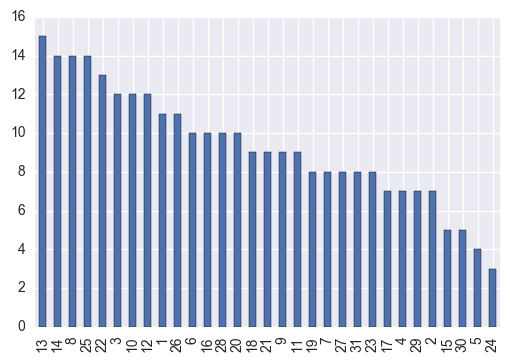

In [38]:
#Distribution based on day of month when death of person occured, as reported by authorities
X[X['both']==1].DEATH_DA.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_DA.value_counts()

8     34
3     33
5     32
11    28
9     28
4     28
10    25
1     19
7     18
6     18
12    14
2     12
Name: DEATH_MO, dtype: int64

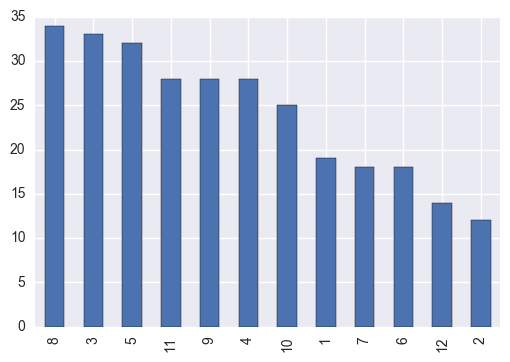

In [41]:
#Distribution based on the month of death
X[X['both']==1].DEATH_MO.value_counts().plot(kind='bar')
X[X['both']==1].DEATH_MO.value_counts()

No                268
Not Applicable     20
Yes                 1
Name: WORK_INJ, dtype: int64

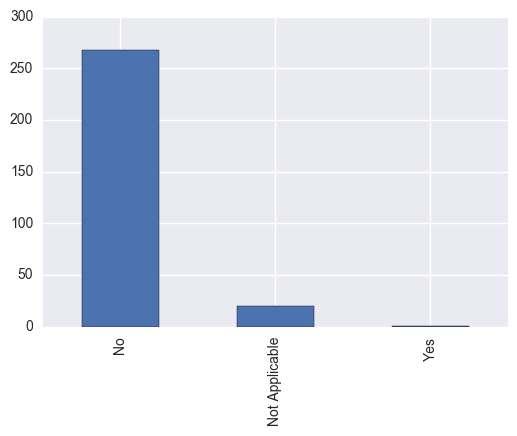

In [42]:
replacements = {
     'WORK_INJ': {0:'No', 1:'Yes', 8:'Not Applicable'},
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on if the crash occured when the preson was at work
X[X['both']==1].WORK_INJ.value_counts().plot(kind='bar')
X[X['both']==1].WORK_INJ.value_counts()

White              196
Black               50
All Other Races     38
Asian                5
Name: RACE, dtype: int64

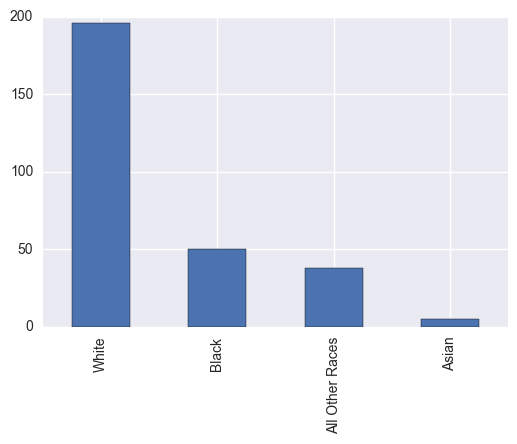

In [43]:
replacements = {
     'RACE': {0:'Not A Fatality', 1:'White', 2:'Black',98:'All Other Races', 8:'Asian'}
          }
X.replace(replacements, regex=True, inplace=True)

#Distribution based on the Race of the person
X[X['both']==1].RACE.value_counts().plot(kind='bar')
X[X['both']==1].RACE.value_counts()

California        25
South Carolina    22
Florida           17
New York          15
Kentucky          13
Texas             13
Ohio              12
Washington        11
Missouri          11
Michigan          11
Colorado          10
Virginia          10
Illinois           9
Pennsylvania       9
Indiana            9
Nevada             8
Georgia            8
Alabama            7
Wisconsin          7
Louisiana          6
Tennessee          6
Arizona            4
New Jersey         4
Minnesota          4
New Mexico         4
Nebraska           4
Idaho              3
New Hampshire      3
Mississippi        3
Connecticut        3
Alaska             3
Kansas             3
Arkansas           3
Vermont            2
Wyoming            1
Hawaii             1
Delaware           1
Montana            1
Massachusetts      1
Utah               1
Iowa               1
Name: STATE, dtype: int64

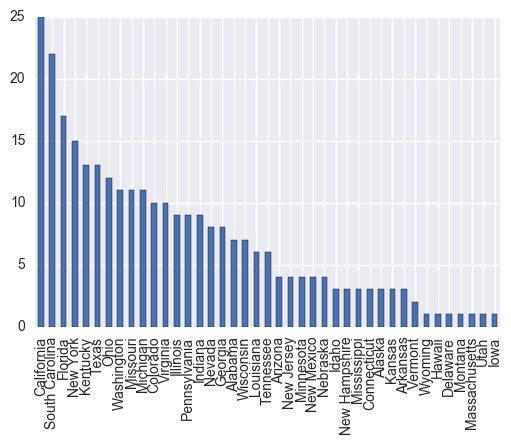

In [47]:
replacements = {
     'STATE': {1:'Alabama', 31:'Nebraska', 2:'Alaska', 32:'Nevada',4:'Arizona', 33:'New Hampshire', 5:'Arkansas', 34:'New Jersey',
             6: 'California', 35:'New Mexico', 8:'Colorado', 36:'New York', 9:'Connecticut', 37:'North Carolina', 10:'Delaware',
             38:'North Dakota', 11:'District of Columbia', 39:'Ohio', 12:'Florida', 40:'Oklahoma', 13:'Georgia', 41:'Oregon',
             15:'Hawaii', 42:'Pennsylvania', 16:'Idaho', 43:'Puerto Rico', 17:'Illinois', 44:'Rhode Island', 18:'Indiana',
             45:'South Carolina', 19:'Iowa', 46:'South Dakota', 20:'Kansas', 47:'Tennessee', 21:'Kentucky', 48:'Texas', 
             22:'Louisiana', 49:'Utah', 23:'Maine', 50:'Vermont', 24:'Maryland', 52:'Virgin Islands', 25:'Massachusetts', 
             51:'Virginia', 26:'Michigan', 53:'Washington', 27:'Minnesota', 54:'WestVirginia', 28:'Mississippi',
             55:'Wisconsin', 29:'Missouri', 56:'Wyoming', 30:'Montana'}}
X.replace(replacements, regex=True, inplace=True)

#Distribution based on STATE
X[X['both']==1].STATE.value_counts().plot(kind='bar')
X[X['both']==1].STATE.value_counts()

### Continuing further analysis on Project_analysis-actual-test.ipynb